In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dft=pd.read_csv('/content/drive/My Drive/IBM_sentiment_analysis/data/cleaned_vader_labelled_5days_partition/feb_11-15.csv')


In [ ]:
df=dft
print(df.shape)
df.isnull().sum()
df.head()

(25077, 7)


,date,id,text,hashtags,retweet_count,location,cleaned
0,2020-02-15,1228602597914730500,"Adviser Sahab, if #Chinese return to #Pak from...","['Chinese', 'Pak', 'coronavirus', 'China', 'Pa...",0.0,"{'country_code': 'in', 'state': 'Delhi'}",adviser sahab chinese return pak coronavirus h...
1,2020-02-15,1228606356271157249,WHO says joint China mission to start coronavi...,[],37.0,{'country_code': 'in'},says joint china mission start coronavirus pro...
2,2020-02-15,1228606635091931136,BREAKING: Tokyo reports 8 new cases of coronav...,[],249.0,{'country_code': 'in'},breaking tokyo reports new cases coronavirus l...
3,2020-02-15,1228606821994094592,A total of 185 Nepalis from China's #Hubei pro...,"['Hubei', 'coronavirus', 'Nepal', 'Coronavirus...",2.0,"{'country_code': 'in', 'state': 'Delhi'}",total nepalis china hubei province epicentre c...
4,2020-02-15,1228606924033101824,BREAKING: 8 new cases of coronavirus in Japan,[],459.0,{'country_code': 'in'},breaking new cases coronavirus japan


In [ ]:
df.tail()

,date,id,text,hashtags,retweet_count,location,cleaned
25072,2020-02-15,1228738868079292416,Medical staff in full protective gear got quar...,"['COVID19', 'Coronavirus']",30.0,{'country_code': 'in'},medical staff full protective gear got quarant...
25073,2020-02-15,1228763997706608641,That's one hell of a #onepunchman fan. https:/...,['onepunchman'],0.0,{'country_code': 'in'},one hell onepunchman fan
25074,2020-02-15,1228730441017872385,"When China sneezes, the world economy catches ...",[],12.0,{'country_code': 'in'},china sneezes world economy catches cold jp mo...
25075,2020-02-15,1228729339576905728,#HiddenTruth_Of_Bible\nBible's - lyov 36:5 pr...,"['HiddenTruth_Of_Bible', 'coronavirus', 'COVID...",4.0,{'country_code': 'in'},hiddentruth bible bible lyov proves god kabir ...
25076,2020-02-15,1228734246937743361,Coronavirus is a global game of Russian roulet...,[],8.0,{'country_code': 'in'},coronavirus global game russian roulette know ...


In [ ]:
print(df.shape)
df.isnull().sum()

(25077, 7)


date             0
id               0
text             0
hashtags         0
retweet_count    0
location         0
cleaned          0
dtype: int64

In [ ]:
!pip install -U pywsd

Requirement already up-to-date: pywsd in /usr/local/lib/python3.6/dist-packages (1.2.4)


In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
text_clean=df['cleaned']

In [ ]:
text_clean=text_clean.str.replace('?','')
text_clean=text_clean.str.replace('!','')

In [ ]:
text_clean[:5]

0    adviser sahab chinese return pak coronavirus h...
1    says joint china mission start coronavirus pro...
2    breaking tokyo reports new cases coronavirus l...
3    total nepalis china hubei province epicentre c...
4                 breaking new cases coronavirus japan
Name: cleaned, dtype: object

In [ ]:
print(len(text_clean))
text_clean[0]

25077


'adviser sahab chinese return pak coronavirus hit china make difference anything return pakistani students seeking assistance also disturb anything neither fake pak china relationship unstable economy '

In [ ]:
from pywsd.utils import lemmatize_sentence
t_clean=[lemmatize_sentence(s) for s in text_clean]

Warming up PyWSD (takes ~10 secs)... took 5.365933418273926 secs.


In [ ]:
t_clean[0]

['adviser',
 'sahab',
 'chinese',
 'return',
 'pak',
 'coronavirus',
 'hit',
 'china',
 'make',
 'difference',
 'anything',
 'return',
 'pakistani',
 'student',
 'seek',
 'assistance',
 'also',
 'disturb',
 'anything',
 'neither',
 'fake',
 'pak',
 'china',
 'relationship',
 'unstable',
 'economy']

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud

In [ ]:
from itertools import chain
words=list(chain.from_iterable(t_clean))


In [ ]:
print(words[0])

adviser


In [ ]:
string=' '.join(words)

In [ ]:
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10,stopwords=['corona','coronavirus','virus','coronavirusoutbreak','covid','viru','coronaviru','novel']).generate(string)

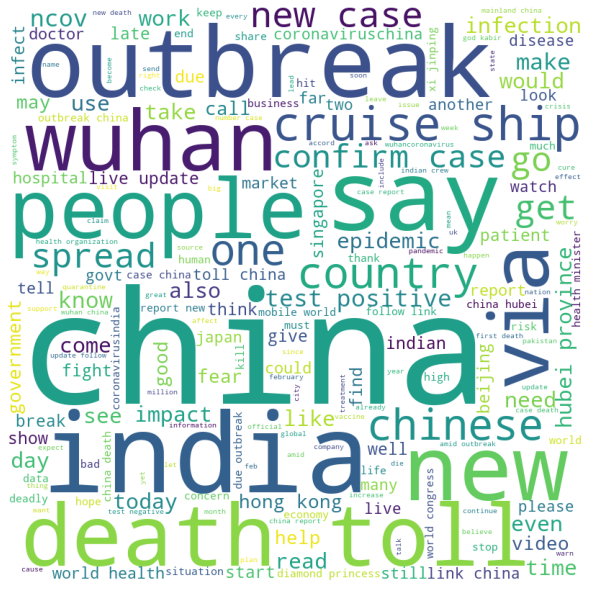

In [ ]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
f_clean=[]
for l in t_clean:
  s=' '.join(l)
  f_clean.append(s)

In [ ]:
f_clean[:5]

['adviser sahab chinese return pak coronavirus hit china make difference anything return pakistani student seek assistance also disturb anything neither fake pak china relationship unstable economy',
 'say joint china mission start coronavirus probe weekend',
 'break tokyo report new case coronavirus least linked taxi driver nhk',
 'total nepalis china hubei province epicentre coronavirus reach capital kathmandu sunday local medium nepal coronavirusoutbreak covid',
 'break new case coronavirus japan']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=1000, ngram_range=(2,3),stop_words=['corona','coronavirus','virus','coronavirusoutbreak','covid','viru','coronaviru','novel'])
tf = tf_vectorizer.fit_transform(f_clean)
tf_feature_names = tf_vectorizer.get_feature_names()

In [ ]:
tf_feature_names

['across china',
 'across country',
 'across world',
 'adhanom ghebreyesus',
 'adviser say',
 'affect many',
 'affect many case',
 'afp news',
 'afp news agency',
 'air india',
 'amb india',
 'amid fear',
 'amid outbreak',
 'andhra man',
 'andhra pradesh',
 'animal bird',
 'announces first',
 'another people',
 'around world',
 'artificial intelligence',
 'assistance via',
 'assistance via namo',
 'back work',
 'ban export',
 'bangkok delhi',
 'bangkok delhi flight',
 'bangkok delhi suspect',
 'bbc news',
 'become late',
 'beijing order',
 'bible bible',
 'bible bible lyov',
 'bible lyov',
 'bible lyov prove',
 'big mobile',
 'big phone',
 'big phone show',
 'bio weapon',
 'biological warfare',
 'biological weapon',
 'board cruise',
 'board cruise ship',
 'board quarantine',
 'break news',
 'bring total',
 'bring total number',
 'cancel due',
 'cancel due concern',
 'cancel due fear',
 'cancel fear',
 'cancel global',
 'cancel global marketing',
 'cancel mwc',
 'case bring',
 'case chi

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=10, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

In [ ]:
def display_topics(model, feature_names, no_top_words):
  s=''
  for topic_idx, topic in enumerate(model.components_):
    s=s+("Topic %d:" % (topic_idx))
    s=s+(",".join([feature_names[i]
                    for i in topic.argsort()[:-no_top_words - 1:-1]]))
    s=s+'\n'
  return s

no_top_words = 10
display_topics(lda, tf_feature_names, no_top_words)

'Topic 0:test positive,health minister,indian national,crew member,year old,two indian,china wuhan,china india,first death,close contact\nTopic 1:new case,death toll,hubei province,confirm case,china hubei,china death,report new,new death,china death toll,china hubei province\nTopic 2:letter xi,china praise pm,praise pm,letter xi jinping,jinping assistance,xi jinping assistance,friendship china praise,modi letter,modi letter xi,demonstrates friendship china\nTopic 3:death toll,confirm case,toll china,death toll china,due outbreak,friendship china,official name,medical staff,china outbreak,single day\nTopic 4:live update,world health,xi jinping,world congress,mobile world,mobile world congress,health organization,world health organization,china praise,amid outbreak\nTopic 5:india first,first patient,india first patient,patient stable,cancel due,first patient stable,people die,mwc cancel,late update,say outbreak\nTopic 6:link china,follow link,follow link china,update follow,update follo

In [ ]:
lda.perplexity(tf)

429.2653841977446

In [ ]:
f=open('lda_feb_11-15.pk','wb')
import pickle
pickle.dump(lda, f)
f.close()

In [ ]:
f = open("topics_feb_11-15.txt", "w")
f.write(display_topics(lda, tf_feature_names, no_top_words))
f.close()

In [ ]:
import shutil
shutil.move('lda_feb_11-15.pk','/content/drive/My Drive/IBM_sentiment_analysis/topic_modelling/saved_models/lda_feb_11-15.pk')
shutil.move("topics_feb_11-15.txt",'/content/drive/My Drive/IBM_sentiment_analysis/topic_modelling/topics_text_files/topics_feb_11-15.txt')